In [2]:
%cd '/content/drive/MyDrive/FaceMask_Detection '

/content/drive/MyDrive/FaceMask_Detection 


In [3]:
!pwd

/content/drive/MyDrive/FaceMask_Detection 


In [4]:
import os
os.environ['KAGGLE_CONFIG_DIR']='/content/drive/MyDrive/FaceMask_Detection '


In [ ]:
!kaggle datasets download -d omkargurav/face-mask-dataset
!unzip \*.zip && rm *zip

##**Import Libraries**

In [5]:
import cv2
import os
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np
import keras
import tensorflow as tf
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import classification_report

## **Read Data**

Open The Folders

In [6]:
with_mask='/content/drive/MyDrive/FaceMask_Detection /data/with_mask'
without_mask='/content/drive/MyDrive/FaceMask_Detection /data/without_mask'
#Show The Table Which Count The Number Of With_Mask and without_Mask 
pd.DataFrame([len(os.listdir(with_mask)),len(os.listdir(without_mask))],columns=['Number'],index=['with_mask','without_mask'])

,Number
with_mask,3725
without_mask,3828


Show The Images

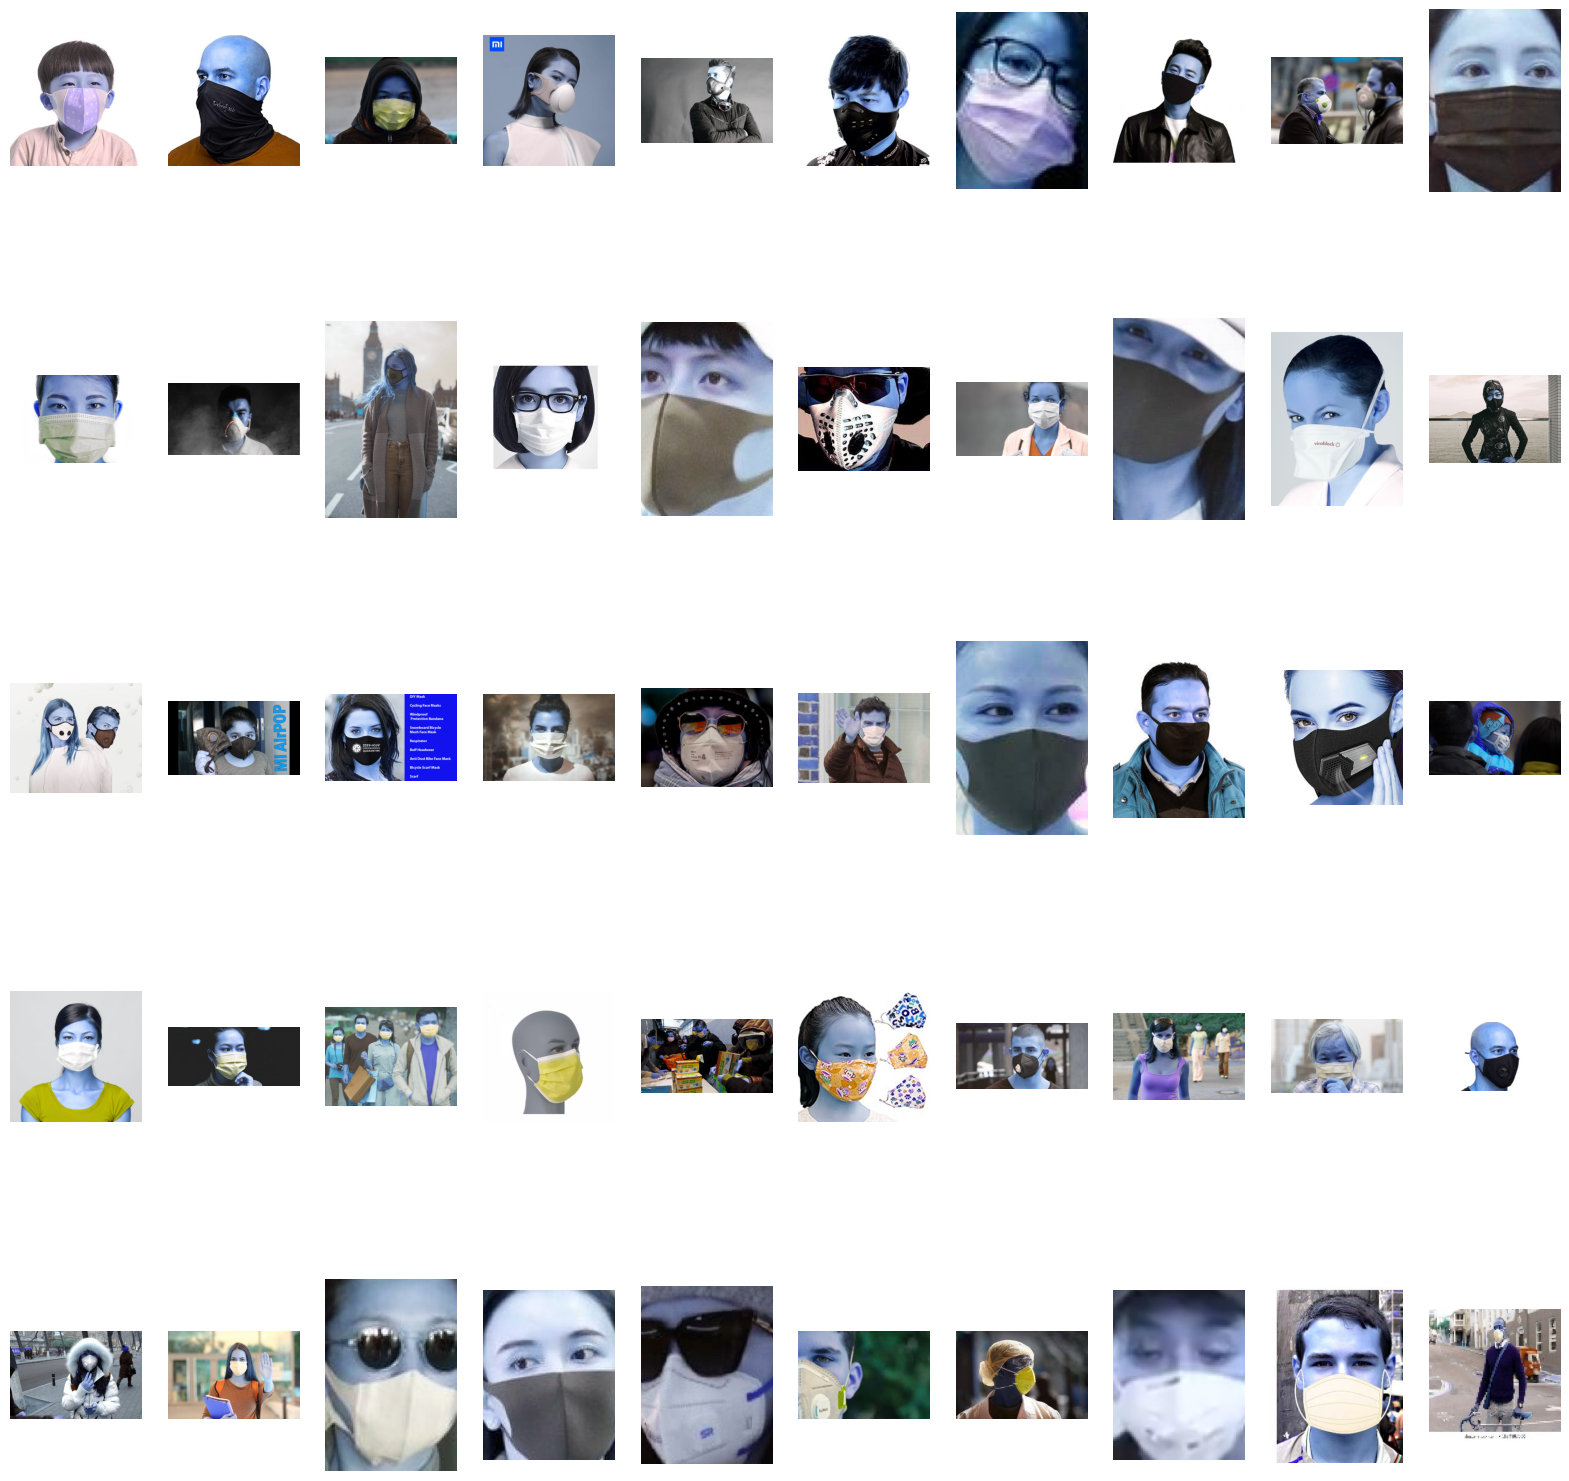

In [11]:
#Show With Mask Image
i=1
plt.figure(figsize=(20,20))
for img in os.listdir(with_mask):
    if i==51:
        break
    plt.subplot(5,10,i)
    #Read The Images in  with_mask and put it in img_arr as Numpy array
    img_arr=cv2.imread(os.path.join(with_mask,img))
    #Show it
    plt.imshow(img_arr)
    i+=1
    plt.axis('off')


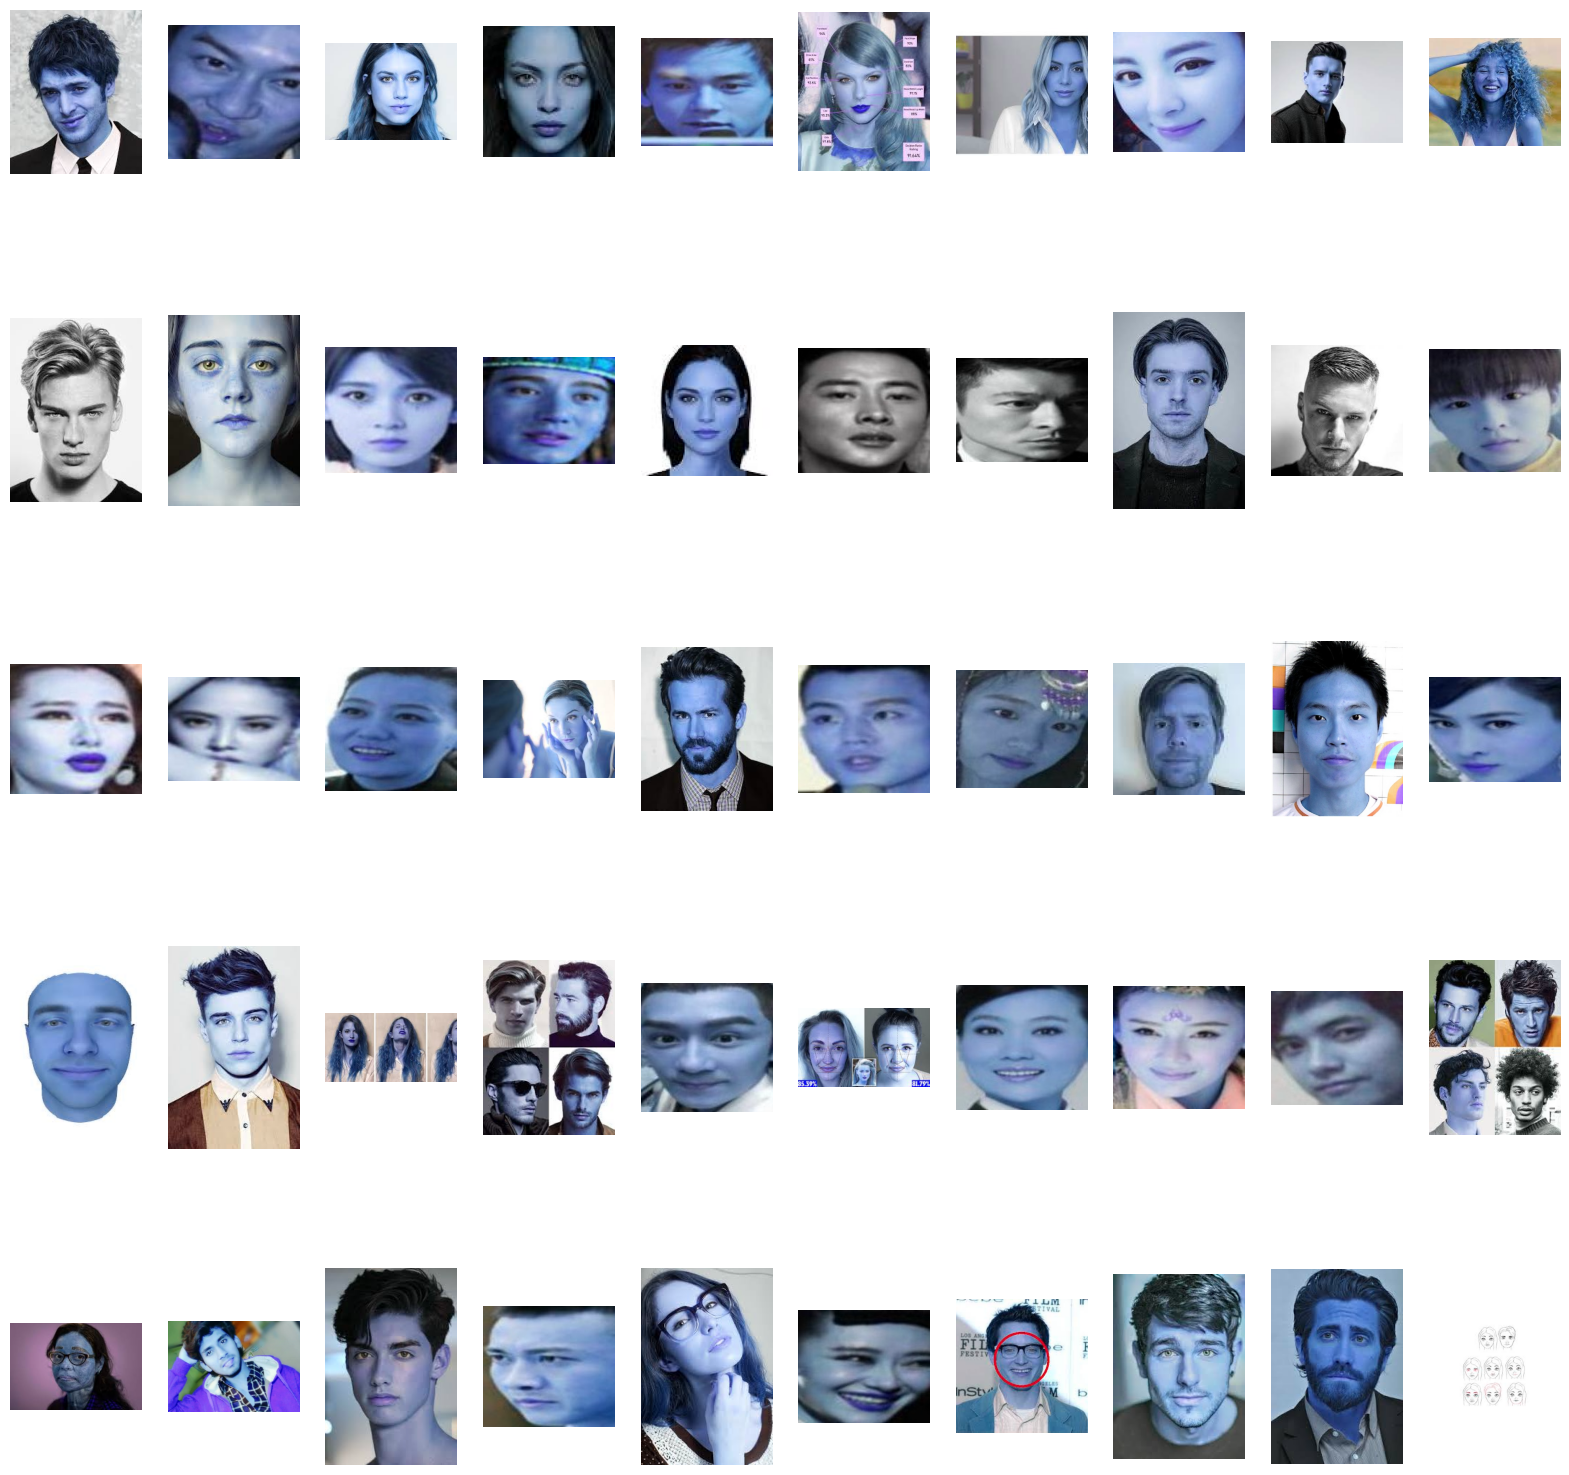

In [12]:
#Show Without Mask Image
i=1
plt.figure(figsize=(20,20))
for img in os.listdir(without_mask):
    if i==51:
        break
    plt.subplot(5,10,i)
    #Read The Images in  without mask and put it in img_arr as Numpy array
    img_arr=cv2.imread(os.path.join(without_mask,img))
    #show it
    plt.imshow(img_arr)
    i+=1
    plt.axis('off')

Store the Input and OuTput and Size of Images in Lists

In [22]:
#input
data=[]
#output
label=[]
#the size of Images
size=[]
#with mask label 1
#open With Mask Folder
for img in os.listdir(with_mask):
    #encode the With Mask Images and put it in Img_arr as Numpy array
    img_arr=cv2.imread(os.path.join(with_mask,img))
    #append the Img_arr which contain encoded with Mask Images to Data list
    data.append(img_arr)
    #append 1 to Label list to each With Mask Images
    label.append(1)
    #append The Size of With Mask Images to Size list
    size.append(img_arr.shape)
#without mask label 0
#open Without Mask Folder
for img in os.listdir(without_mask):
    #encode the With Mask Images and put it in Img_arr as Numpy array
    img_arr=cv2.imread(os.path.join(without_mask,img))
    #append the Img_arr which contain encoded without Mask Images to Data list
    data.append(img_arr)
    #append 0 to Label list to each Without Mask Images
    label.append(0)
    #append The Size of With Mask Images to Size list
    size.append(img_arr.shape)

Show The Unique size of Images in Table

In [23]:
pd.DataFrame(pd.Series(size).value_counts(),columns=['Number'])

,Number
"(225, 225, 3)",664
"(428, 320, 3)",381
"(275, 183, 3)",255
"(100, 100, 3)",207
"(183, 275, 3)",181
...,...
"(48, 38, 3)",1
"(193, 152, 3)",1
"(58, 63, 3)",1
"(103, 76, 3)",1


Resize The Images

In [48]:
Size=128
for x in range(len(data)):
    data[x]=cv2.resize(data[x],(Size,Size))

##**Split Data to Training and Test**

In [49]:
data=np.array(data)
label=np.array(label)
#spilt data to X_train,X_test and label to y_train,y_test
X_train,X_test,y_train,y_test=train_test_split(data,label,test_size=.15,shuffle=True,random_state=44)
#print it
print('X Train Shape is :',X_train.shape)
print('X Test Shape is :',X_test.shape)
print('Y Train Shape is :',y_train.shape)
print('Y Test Shape is :',y_test.shape)


X Train Shape is : (6420, 128, 128, 3)
X Test Shape is : (1133, 128, 128, 3)
Y Train Shape is : (6420,)
Y Test Shape is : (1133,)


## **Building Model**

Create The Neural Networks Model with CNN Layers 

In [50]:
#creates a new sequential model(Neural Networks) to which we will add layers.
model=keras.models.Sequential()
#this line adds a CNN layer with n filters (output channels), each of size 3x3. The activation function used is Rectified Linear Unit (ReLU)
model.add(keras.layers.Conv2D(filters=64,kernel_size=(3,3),activation=tf.nn.relu,input_shape=(Size,Size,3)))
# adds a max pooling layer with a pool size of 3x3. This will reduce the spatial dimensions of the feature maps output by the previous CNN layer.
model.add(keras.layers.MaxPooling2D((3,3)))
model.add(keras.layers.Conv2D(filters=32,kernel_size=(3,3),activation=tf.nn.relu))
model.add(keras.layers.MaxPooling2D((3,3)))
#convet the model to 1D Vector
model.add(keras.layers.Flatten())
#this line adds a fully connected layer with n neurons and ReLU activation function.
model.add(keras.layers.Dense(128, activation='relu'))
#This line randomly drop 20% of the neurons in the previous layer during training
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.2))
#this line adds a fully connected layer with n neurons and Softmax activation function.
model.add(keras.layers.Dense(2, activation='softmax'))

In [51]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 126, 126, 64)      1792      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 42, 42, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 40, 40, 32)        18464     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 5408)              0         
                                                                 
 dense_6 (Dense)             (None, 128)              

Compile and Train The Model

In [52]:
model.compile(optimizer ='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
hist=model.fit(X_train,y_train,epochs=10,validation_split = 0.11)


Epoch 1/10
179/179 [==============================] - 5s 16ms/step - loss: 2.1807 - accuracy: 0.7658 - val_loss: 0.3280 - val_accuracy: 0.8642
Epoch 2/10
179/179 [==============================] - 3s 14ms/step - loss: 0.3857 - accuracy: 0.8453 - val_loss: 0.8477 - val_accuracy: 0.5629
Epoch 3/10
179/179 [==============================] - 3s 14ms/step - loss: 0.4265 - accuracy: 0.8143 - val_loss: 0.3431 - val_accuracy: 0.8586
Epoch 4/10
179/179 [==============================] - 3s 14ms/step - loss: 0.3552 - accuracy: 0.8642 - val_loss: 0.2681 - val_accuracy: 0.8812
Epoch 5/10
179/179 [==============================] - 3s 15ms/step - loss: 0.2610 - accuracy: 0.8948 - val_loss: 0.2655 - val_accuracy: 0.8812
Epoch 6/10
179/179 [==============================] - 3s 16ms/step - loss: 0.2433 - accuracy: 0.9020 - val_loss: 0.2662 - val_accuracy: 0.8967
Epoch 7/10
179/179 [==============================] - 3s 14ms/step - loss: 0.2404 - accuracy: 0.9036 - val_loss: 0.2380 - val_accuracy: 0.9109

Show The Loss and Accuracy in Table 

In [53]:
hist=pd.DataFrame(hist.history)
hist

,loss,accuracy,val_loss,val_accuracy
0,2.180726,0.765797,0.327963,0.864215
1,0.385669,0.845265,0.847719,0.562942
2,0.426451,0.814283,0.343117,0.858557
3,0.355223,0.864169,0.268123,0.881188
4,0.261003,0.894801,0.265475,0.881188
5,0.243284,0.901978,0.266240,0.896747
6,0.240416,0.903553,0.237963,0.910891
7,0.190048,0.920707,0.271948,0.929279
8,0.194819,0.920182,0.201876,0.932108
9,0.158720,0.940487,0.321566,0.923621


Show Graph Between Accuracy Train and Validation Accuracy

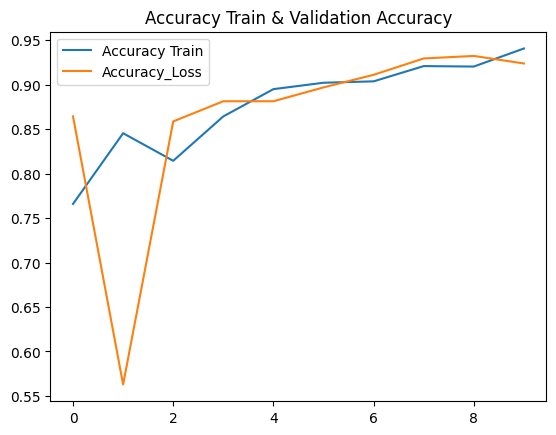

In [54]:
plt.plot(hist['accuracy'],label='Accuracy Train')
plt.plot(hist['val_accuracy'],label='Accuracy_Loss')
plt.title('Accuracy Train & Validation Accuracy')
plt.legend()

Show Graph Between Loss Train and Validation Loss

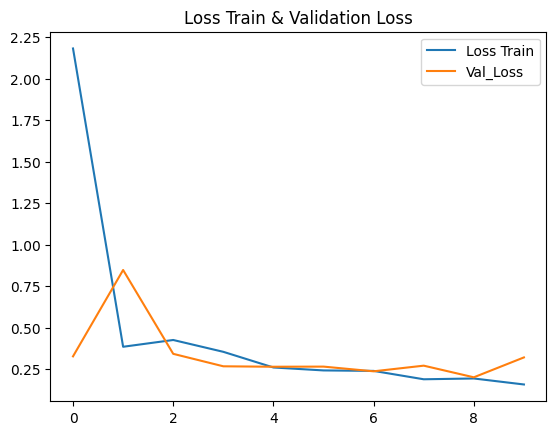

In [55]:
plt.plot(hist['loss'],label='Loss Train')
plt.plot(hist['val_loss'],label='Val_Loss')
plt.title('Loss Train & Validation Loss')
plt.legend()

Evaluate The Model and Print Accuracy and Loss  

In [56]:
score, acc = model.evaluate(X_test, y_test)
print('Test Loss =', score)
print('Test Accuracy =', acc)

36/36 [==============================] - 0s 6ms/step - loss: 0.2781 - accuracy: 0.9126
Test Loss = 0.2780556082725525
Test Accuracy = 0.9126213788986206


Predict The Output and Print it 

In [57]:
prediction = model.predict(X_test)
prediction

36/36 [==============================] - 0s 4ms/step


array([[9.9996889e-01, 3.1100222e-05],
       [9.6066827e-01, 3.9331783e-02],
       [3.8770637e-01, 6.1229366e-01],
       ...,
       [4.4345297e-03, 9.9556547e-01],
       [1.7999633e-01, 8.2000369e-01],
       [2.8448719e-07, 9.9999976e-01]], dtype=float32)

Store Prediction of each Row in List and Show it in The Table  

In [58]:
pred_label=[]
for row in prediction:
    #finds the index of the maximum value in each row 
    N=np.argmax(row)
    if N==1:
        pred_label.append('with mask')
    else:
        pred_label.append('without mask')
#show it in table
pd.DataFrame(pred_label,columns=['Prediction'])

,Prediction
0,without mask
1,without mask
2,with mask
3,without mask
4,with mask
...,...
1128,with mask
1129,with mask
1130,with mask
1131,with mask


Show The Images in The List of Prediction 

In [59]:
plt.figure(figsize=(20,30))
i=1
for img in X_test:
    if i==51:
        break
    plt.subplot(10,5,i)
    plt.imshow(img)
    plt.title(pred_label[i-1])
    plt.legend()
    i+=1
    plt.axis('off')

Output hidden; open in https://colab.research.google.com to view.

## **Calculating Confusion Matrix**

array([[551,  42],
       [ 57, 483]])

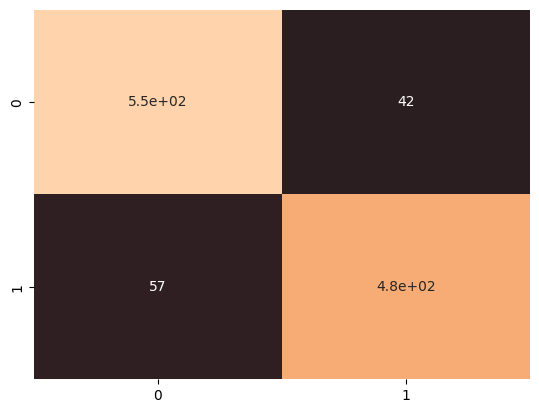

In [60]:
y_pred=[1 if m=='with mask' else 0 for m in pred_label]
CM = confusion_matrix(y_test, y_pred)
sns.heatmap(CM, center = True,annot=True,cbar=False)
CM

## **Calculating classification Report**

In [61]:
ClassificationReport = classification_report(y_test,y_pred)
print('Classification Report is : ', ClassificationReport )

Classification Report is :                precision    recall  f1-score   support

           0       0.91      0.93      0.92       593
           1       0.92      0.89      0.91       540

    accuracy                           0.91      1133
   macro avg       0.91      0.91      0.91      1133
weighted avg       0.91      0.91      0.91      1133

